In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('corona1234.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   test_date                278848 non-null  object
 1   State                    278848 non-null  object
 2   cough                    278848 non-null  int64 
 3   fever                    278848 non-null  int64 
 4   sore_throat              278848 non-null  int64 
 5   shortness_of_breath      278848 non-null  int64 
 6   head_ache                278848 non-null  int64 
 7   corona_result            278848 non-null  object
 8   age_60_and_above         172702 non-null  object
 9   gender                   267025 non-null  object
 10  Patient admitted status  278848 non-null  object
 11  CT_SCAN Value            278848 non-null  object
dtypes: int64(5), object(7)
memory usage: 25.5+ MB


In [4]:
df.head()

test_date           State  cough  fever  sore_throat  shortness_of_breath  \
0  30-04-2020  Madhya Pradesh      0      1            0                    0   
1  30-04-2021  Madhya Pradesh      1      1            1                    1   
2  30-04-2020  Madhya Pradesh      0      1            0                    0   
3  30-04-2020  Madhya Pradesh      1      1            1                    1   
4  30-04-2020  Madhya Pradesh      1      0            0                    0   

   head_ache corona_result age_60_and_above  gender  \
0          1      positive              Yes  female   
1          1      positive              Yes  female   
2          0      negative              Yes     NaN   
3          1      positive              NaN    male   
4          0      negative              Yes     NaN   

                   Patient admitted status CT_SCAN Value  
0         Patient admitted to regular ward  Less than 12  
1  Patient admitted to intensive care unit  More than 17  
2                             Not admitted  Not required  
3  Patient admitted to intensive care unit  More than 17  
4                             Not admitted  Not required

In [5]:
df.tail()

test_date      State  cough  fever  sore_throat  shortness_of_breath  \
278843  11/3/2020      Ladak      0      0            0                    0   
278844  11/3/2020      Ladak      0      0            0                    0   
278845  11/3/2020  Telangana      1      1            1                    1   
278846  11/3/2020  Telangana      1      0            0                    0   
278847  11/3/2020      Ladak      0      0            0                    0   

        head_ache corona_result age_60_and_above  gender  \
278843          0      negative               No  female   
278844          0      negative               No  female   
278845          1      positive              NaN  female   
278846          0      positive              NaN     NaN   
278847          0      negative              NaN  female   

                        Patient admitted status                  CT_SCAN Value  
278843                             Not admitted                   Not required  
278844                             Not admitted                   Not required  
278845  Patient admitted to intensive care unit                   More than 17  
278846  Patient admitted to semi-intensive unit  More than 12 and less than 17  
278847                             Not admitted                   Not required

In [6]:
df.shape

(278848, 12)

# VISUALISATION

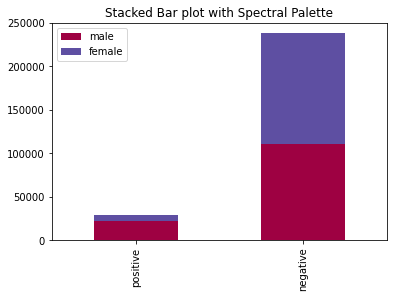

In [7]:
positive = df.loc[df['corona_result']=='positive', :]['gender'].value_counts()
negative = df.loc[df['corona_result']=='negative', :]['gender'].value_counts()
df_plot  = pd.DataFrame([positive,negative])
df_plot.index=['positive','negative']

# Bar plot
df_plot.plot(kind='bar',stacked=True, colormap='Spectral', title='Stacked Bar plot with Spectral Palette');

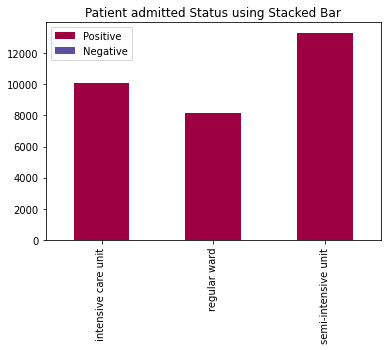

In [8]:
#Not_admitted = df.loc[df['Patient admitted status']=='Not admitted', :]['corona_result'].value_counts()
intensive_care_unit = df.loc[df['Patient admitted status']=='Patient admitted to intensive care unit', :]['corona_result'].value_counts()
regular_ward = df.loc[df['Patient admitted status']=='Patient admitted to regular ward', :]['corona_result'].value_counts()
semiintensive_unit = df.loc[df['Patient admitted status']=='Patient admitted to semi-intensive unit', :]['corona_result'].value_counts()
df_plot  = pd.DataFrame([intensive_care_unit,regular_ward,semiintensive_unit])
df_plot.index=['intensive care unit','regular ward','semi-intensive unit']

# Bar plot
df_plot.plot(kind='bar',stacked=True, colormap='Spectral', title='Patient admitted Status using Stacked Bar');
plt.legend(['Positive','Negative'])

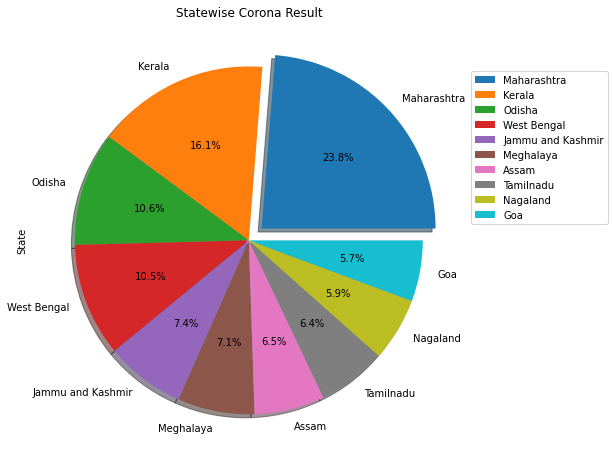

In [9]:
df['State'].value_counts().head(10).plot.pie(explode=[0.1,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%',shadow=True,figsize=(10,8))
#plt.gca().set_aspect('equal')
plt.title("Statewise Corona Result")
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor = (1.0, 0.9))
plt.show()

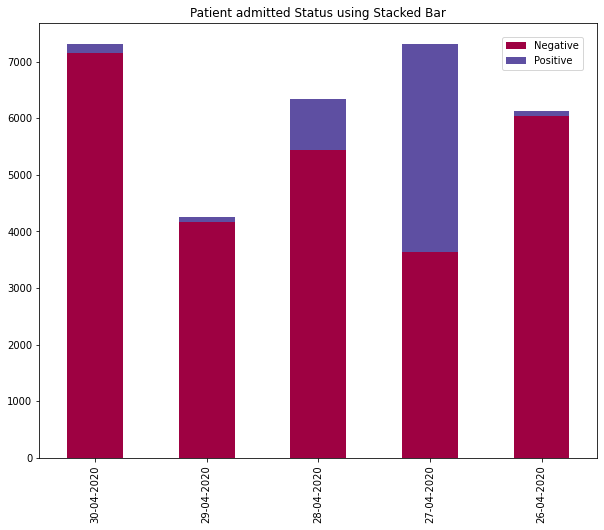

In [10]:
date = df.loc[df['test_date']=='30-04-2020', :]['corona_result'].value_counts()
date1 = df.loc[df['test_date']=='29-04-2020', :]['corona_result'].value_counts()
date2 = df.loc[df['test_date']=='28-04-2020', :]['corona_result'].value_counts()
date3 = df.loc[df['test_date']=='27-04-2020', :]['corona_result'].value_counts()
date4 = df.loc[df['test_date']=='26-04-2020', :]['corona_result'].value_counts()
df_plot  = pd.DataFrame([date,date1,date2,date3,date4])
df_plot.index=['30-04-2020','29-04-2020','28-04-2020','27-04-2020','26-04-2020']

# Bar plot
df_plot.plot(kind='bar',stacked=True, colormap='Spectral', title='Patient admitted Status using Stacked Bar',figsize=(10,8));
plt.legend(['Negative','Positive'],bbox_to_anchor = (0.82, 0.98))

# DATA CLEANING

In [11]:
print(df['corona_result'].unique())
print(df['corona_result'].describe())

['positive' 'negative']
count       278848
unique           2
top       negative
freq        247341
Name: corona_result, dtype: object


In [12]:
#convert (transform) non-numerical labels to numerical labels(0,1,2...) 
corona_result_encoder = LabelEncoder()
df['corona_result'] = corona_result_encoder.fit_transform(df['corona_result'])
print(df['corona_result'].unique())

[1 0]


In [13]:
print(df['gender'].unique())
print(df['gender'].describe())

['female' nan 'male']
count     267025
unique         2
top       female
freq      134575
Name: gender, dtype: object


In [14]:
df["gender"].fillna("No Gender", inplace = True) 
print(df['gender'].unique())

['female' 'No Gender' 'male']


In [15]:
#convert (transform) non-numerical(F,M) labels to numerical labels(0,1,2...) 
gender_encoder = LabelEncoder()
df['gender'] = gender_encoder.fit_transform(df['gender'])
print(df['gender'].unique())

[1 0 2]


In [16]:
print(df['age_60_and_above'].unique())
print(df['age_60_and_above'].describe())

['Yes' nan 'No']
count     172702
unique         2
top           No
freq      136897
Name: age_60_and_above, dtype: object


In [17]:
df["age_60_and_above"].fillna("Not mentioned", inplace = True) 
print(df['age_60_and_above'].unique())

['Yes' 'Not mentioned' 'No']


In [18]:
#convert (transform) non-numerical(F,M) labels to numerical labels(0,1,2...) 
age_60_and_above_encoder = LabelEncoder()
df['age_60_and_above'] = age_60_and_above_encoder.fit_transform(df['age_60_and_above'])
print(df['age_60_and_above'].unique())

[2 1 0]


In [19]:
print(df['Patient admitted status'].unique())
print(df['Patient admitted status'].describe())

['Patient admitted to regular ward'
 'Patient admitted to intensive care unit' 'Not admitted'
 'Patient admitted to semi-intensive unit']
count           278848
unique               4
top       Not admitted
freq            247340
Name: Patient admitted status, dtype: object


In [20]:
Patient_admitted_status_encoder = LabelEncoder()
df['Patient admitted status'] = Patient_admitted_status_encoder.fit_transform(df['Patient admitted status'])
print(df['Patient admitted status'].unique())

[2 1 0 3]


In [21]:
print(df['CT_SCAN Value'].unique())
print(df['CT_SCAN Value'].describe())

['Less than 12' 'More than 17' 'Not required'
 'More than 12 and less than 17']
count           278848
unique               4
top       Not required
freq            247348
Name: CT_SCAN Value, dtype: object


In [22]:
CT_SCAN_Value_encoder = LabelEncoder()
df['CT_SCAN Value'] = CT_SCAN_Value_encoder.fit_transform(df['CT_SCAN Value'])
print(df['CT_SCAN Value'].unique())

[0 2 3 1]


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   test_date                278848 non-null  object
 1   State                    278848 non-null  object
 2   cough                    278848 non-null  int64 
 3   fever                    278848 non-null  int64 
 4   sore_throat              278848 non-null  int64 
 5   shortness_of_breath      278848 non-null  int64 
 6   head_ache                278848 non-null  int64 
 7   corona_result            278848 non-null  int32 
 8   age_60_and_above         278848 non-null  int32 
 9   gender                   278848 non-null  int32 
 10  Patient admitted status  278848 non-null  int32 
 11  CT_SCAN Value            278848 non-null  int32 
dtypes: int32(5), int64(5), object(2)
memory usage: 20.2+ MB


In [24]:
df.head()

test_date           State  cough  fever  sore_throat  shortness_of_breath  \
0  30-04-2020  Madhya Pradesh      0      1            0                    0   
1  30-04-2021  Madhya Pradesh      1      1            1                    1   
2  30-04-2020  Madhya Pradesh      0      1            0                    0   
3  30-04-2020  Madhya Pradesh      1      1            1                    1   
4  30-04-2020  Madhya Pradesh      1      0            0                    0   

   head_ache  corona_result  age_60_and_above  gender  \
0          1              1                 2       1   
1          1              1                 2       1   
2          0              0                 2       0   
3          1              1                 1       2   
4          0              0                 2       0   

   Patient admitted status  CT_SCAN Value  
0                        2              0  
1                        1              2  
2                        0              3  
3                        1              2  
4                        0              3

In [25]:
df.tail()

test_date      State  cough  fever  sore_throat  shortness_of_breath  \
278843  11/3/2020      Ladak      0      0            0                    0   
278844  11/3/2020      Ladak      0      0            0                    0   
278845  11/3/2020  Telangana      1      1            1                    1   
278846  11/3/2020  Telangana      1      0            0                    0   
278847  11/3/2020      Ladak      0      0            0                    0   

        head_ache  corona_result  age_60_and_above  gender  \
278843          0              0                 0       1   
278844          0              0                 0       1   
278845          1              1                 1       1   
278846          0              1                 1       0   
278847          0              0                 1       1   

        Patient admitted status  CT_SCAN Value  
278843                        0              3  
278844                        0              3  
278845                        1              2  
278846                        3              1  
278847                        0              3

In [26]:
corr=df.corr()
print(corr)

                            cough     fever  sore_throat  shortness_of_breath  \
cough                    1.000000  0.515631     0.346097             0.192887   
fever                    0.515631  1.000000     0.415019             0.248949   
sore_throat              0.346097  0.415019     1.000000             0.464217   
shortness_of_breath      0.192887  0.248949     0.464217             1.000000   
head_ache                0.312021  0.389507     0.579878             0.432043   
corona_result            0.420746  0.539803     0.538148             0.344866   
age_60_and_above        -0.051613 -0.043139     0.052889             0.022570   
gender                   0.132169  0.177206     0.172682             0.197947   
Patient admitted status  0.386924  0.483389     0.349567             0.168825   
CT_SCAN Value           -0.303292 -0.398003    -0.305278            -0.160157   

                         head_ache  corona_result  age_60_and_above    gender  \
cough                     0

In [27]:
df = df.drop(['test_date','State'],axis = 1)

In [28]:
for column in df.columns:
    corr = np.corrcoef(df['corona_result'], df[column])
    print(f"corr of corona_result and {column} = {corr[0, 1]}")

corr of corona_result and cough = 0.42074569707904147
corr of corona_result and fever = 0.539802814364541
corr of corona_result and sore_throat = 0.5381476771124978
corr of corona_result and shortness_of_breath = 0.3448655631283412
corr of corona_result and head_ache = 0.5512855436347326
corr of corona_result and corona_result = 1.0
corr of corona_result and age_60_and_above = 0.00410901396646002
corr of corona_result and gender = 0.11088555084872195
corr of corona_result and Patient admitted status = 0.9181123396978377
corr of corona_result and CT_SCAN Value = -0.92475717799235


In [29]:
x = df.drop(['corona_result','age_60_and_above','CT_SCAN Value','Patient admitted status'],axis=1)
y = df['corona_result']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123456)
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

# LOGISTIC REGRESSION

In [31]:
from sklearn.linear_model import LogisticRegressionCV

# create the model
model = LogisticRegressionCV()

# train the model
model.fit(x_train, y_train)


LogisticRegressionCV()

In [32]:
print(model.coef_)

[[ 1.04452388  2.12334604  1.94752347  0.85276757  3.11506253 -0.21280792]]


In [33]:
y_prediction = model.predict(x_test)
#print(y_prediction)

In [34]:
# classsification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     74165
           1       0.95      0.52      0.67      9490

    accuracy                           0.94     83655
   macro avg       0.95      0.76      0.82     83655
weighted avg       0.94      0.94      0.93     83655



In [35]:
# accuracy
print(f"accuracy of the model = {accuracy_score(y_test, y_prediction) * 100: 0.2f} %")

accuracy of the model =  94.23 %


In [36]:
# precision_score
print(f"precision of the model = {precision_score(y_test, y_prediction):0.2f}")

precision of the model = 0.95


### DECISION TREE

In [37]:
from sklearn.tree import DecisionTreeClassifier

# create the model 
model = DecisionTreeClassifier(criterion="entropy")

# train the model
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [38]:
# predict the values
y_prediction = model.predict(x_test)
# print(y_prediction)

In [39]:
# accuracy
from sklearn.metrics import accuracy_score

print(f"accuracy = {accuracy_score(y_test, y_prediction) * 100 :0.2f} %")

accuracy = 94.38 %


In [40]:
# precision_score
print(f"precision of the model = {precision_score(y_test, y_prediction):0.2f}")

precision of the model = 0.95


### KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [42]:
y_prediction = model.predict(x_test)
from sklearn.metrics import accuracy_score

print(f"accuracy = {accuracy_score(y_test, y_prediction) * 100 :0.2f} %")

accuracy = 94.30 %


### SVC

In [43]:
from sklearn.svm import SVC

# create the model 
model = SVC(C=2.0)

# train the model
model.fit(x_train, y_train)

SVC(C=2.0)

In [44]:
# predict the values
y_prediction = model.predict(x_test)
# print(y_prediction)

print(f"accuracy = {accuracy_score(y_test, y_prediction) * 100 :0.2f} %")

accuracy = 94.38 %


### RANDOM FOREST

In [45]:
# create and train the model

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)

# fit the model with x_train and y_train
model.fit(x_train, y_train)
    


RandomForestClassifier(n_estimators=50)

In [46]:
y_prediction = model.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score

print(f"accuracy = {accuracy_score(y_test, y_prediction) * 100 :0.2f} %")

accuracy = 94.38 %


### PATIENT ADMITTED STATUS 

In [48]:
x1 = df.drop(['age_60_and_above','CT_SCAN Value','Patient admitted status','corona_result'],axis=1)
y1 = df['Patient admitted status']

In [49]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=1234)
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [50]:
for column in df.columns:
    corr = np.corrcoef(df['Patient admitted status'], df[column])
    print(f"Patient admitted status and {column} = {corr[0, 1]}")

Patient admitted status and cough = 0.3869244627806682
Patient admitted status and fever = 0.48338893142069306
Patient admitted status and sore_throat = 0.349567254776583
Patient admitted status and shortness_of_breath = 0.16882486370490468
Patient admitted status and head_ache = 0.3462909156058709
Patient admitted status and corona_result = 0.9181123396978378
Patient admitted status and age_60_and_above = -0.006379907039929457
Patient admitted status and gender = 0.034845292963868534
Patient admitted status and Patient admitted status = 0.9999999999999999
Patient admitted status and CT_SCAN Value = -0.919339974574634


### LOGISTICREGRESSION CV

In [51]:
from sklearn.linear_model import LogisticRegressionCV

# create the model
model = LogisticRegressionCV()

# train the model
model.fit(x1_train, y1_train)

LogisticRegressionCV()

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [53]:
y_prediction = model.predict(x1_test)
print(y_prediction)

[0 0 0 ... 0 0 0]


In [54]:
from sklearn.metrics import classification_report

print(classification_report(y1_test, y_prediction))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     74198
           1       0.96      0.95      0.96      3040
           2       0.00      0.00      0.00      2460
           3       0.89      0.44      0.59      3957

    accuracy                           0.94     83655
   macro avg       0.70      0.60      0.63     83655
weighted avg       0.91      0.94      0.92     83655



c:\users\intel\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\intel\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\intel\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [55]:
# accuracy
print(f"accuracy of the model = {accuracy_score(y1_test, y_prediction) * 100: 0.2f} %")

accuracy of the model =  94.01 %


### DECISION TREE

In [56]:
from sklearn.tree import DecisionTreeClassifier

# create the model 
model = DecisionTreeClassifier(criterion="entropy")

# train the model
model.fit(x1_train, y1_train)

DecisionTreeClassifier(criterion='entropy')

In [57]:
y_prediction = model.predict(x1_test)
from sklearn.metrics import accuracy_score

print(f"accuracy = {accuracy_score(y1_test, y_prediction) * 100 :0.2f} %")

accuracy = 94.37 %


### KNN 

In [58]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x1_train, y1_train)

KNeighborsClassifier()

In [59]:
y_prediction = model.predict(x1_test)
from sklearn.metrics import accuracy_score

print(f"accuracy = {accuracy_score(y1_test, y_prediction) * 100 :0.2f} %")

accuracy = 93.78 %


### SVC 

In [60]:
from sklearn.svm import SVC

# create the model 
model = SVC(C=2.0)

# train the model
model.fit(x1_train, y1_train)

SVC(C=2.0)

In [61]:
# predict the values
y_prediction = model.predict(x1_test)
# print(y_prediction)

print(f"accuracy = {accuracy_score(y1_test, y_prediction) * 100 :0.2f} %")

accuracy = 94.37 %


### RANDOM FOREST

In [62]:
# create and train the model

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)

# fit the model with x_train and y_train
model.fit(x1_train, y1_train)

RandomForestClassifier(n_estimators=50)

In [63]:
y_prediction = model.predict(x1_test)

from sklearn.metrics import accuracy_score

print(f"accuracy = {accuracy_score(y1_test, y_prediction) * 100 :0.2f} %")

accuracy = 94.37 %


In [64]:
State = input(f"Enter state : ")
gender = input(f"Enter gender : ")
age = input(f"Enter yes if age greater than 60 otherwise no : ")
cough= input(f"Enter 1 if you have symptom cough otherwise 0 : ")
fever = input(f"Enter 1 if you have symptom fever otherwise 0 : ")
sore_throat = input(f"Enter 1 if you have symptom throat infection otherwise 0 : ")
head_ache= input(f"Enter 1 if you have symptom headache otherwise 0 : ")
shortness_of_breath = input(f"Enter 1 if you have symptom shortness_of_breath otherwise 0 : ")
print("Please select any one from given options :1.Less than 12 2.More than 17 3.Not required 4.More than 12 and less than 17")
CT_SCAN = input(" Enter CT SCAN values : ")

Enter state : Goa
Enter gender : female
Enter yes if age greater than 60 otherwise no : yes
Enter 1 if you have symptom cough otherwise 0 : 1
Enter 1 if you have symptom fever otherwise 0 : 1
Enter 1 if you have symptom throat infection otherwise 0 : 0
Enter 1 if you have symptom headache otherwise 0 : 1
Enter 1 if you have symptom shortness_of_breath otherwise 0 : 1
Please select any one from given options :1.Less than 12 2.More than 17 3.Not required 4.More than 12 and less than 17
 Enter CT SCAN values : 2
